In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [2]:
f = h5py.File('/Users/ahyeon/Desktop/activ misc/predict_scores2.h5', 'r')

In [3]:
predictions = f['score'][:]
norm_predictions = f['norm_score'][:]
labels = f['clusters'][:]
umap_dims = f['umap_dimensions'][:]
cluster_sizes = f['cluster_sizes'][:]

In [4]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(5):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        denom = conf.sum(axis=0)
        new_conf = conf/denom
        plt.matshow(new_conf, cmap='gray_r')
        confalliter.append(new_conf)
    return confalliter

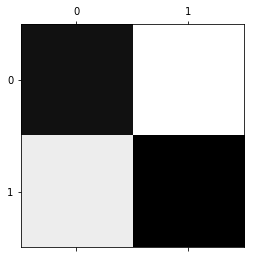

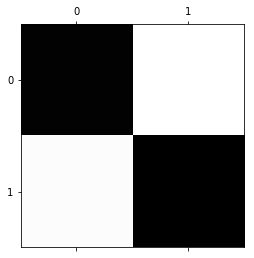

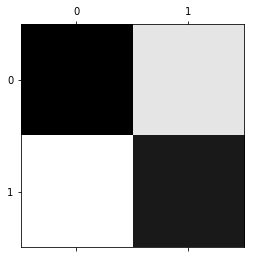

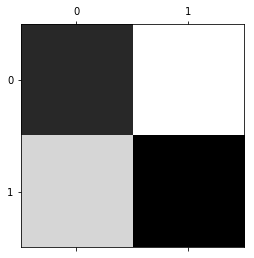

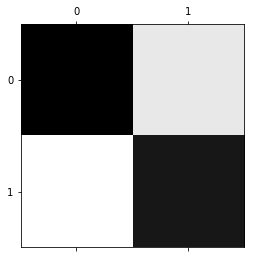

In [5]:
confalliter = conf_alliter(2, predictions, labels)

In [15]:
def foobar(mat):
    print(mat.shape[0])
    tps = []
    tns = []
    fps = []
    fns = []
    for i in range(mat.shape[0]):
        tp = mat[i,i]
        tn = mat.sum() - mat[i,:].sum() - mat[:,i].sum()
        fp = mat[:,i].sum() - mat[i,i]
        fn = mat[i,:].sum() - mat[i,i]
        tps.append(tp)
        tns.append(tn)
        fps.append(fp)
        fns.append(fns)
    avg_tps = np.mean(tps)
    avg_tns = np.mean(tns)
    avg_fps = np.mean(fps)
    avg_fns = np.mean(fns)
    return avg_tps, avg_tns, avg_fps, avg_fns

In [16]:
x = [[1,2],[3,4]]
new = np.matrix(x)
new

matrix([[1, 2],
        [3, 4]])

In [ ]:
a,b,c,d = foobar(new)